# 📊 WhatsApp Chat Analyzer
Analyze WhatsApp group chats for user activity, join/leave events, and peak times.

In [11]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
os.makedirs("outputs", exist_ok=True)

In [15]:
with open("C:/Users/pande/PycharmProjects/PythonProject/Data/Data.txt", "r", encoding="utf-8") as file:
    raw_lines = file.readlines()

data = []
# Updated regex to support AM/PM with unicode non-breaking space
pattern = r"^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2})\s?[apAP][mM] - ([^:]+): (.*)"

for line in raw_lines:
    match = re.match(pattern, line)
    if match:
        date_str, time_str, user, message = match.groups()
        try:
            dt = datetime.strptime(date_str + " " + time_str, "%d/%m/%y %I:%M")
        except ValueError:
            try:
                dt = datetime.strptime(date_str + " " + time_str, "%d/%m/%Y %I:%M")
            except:
                continue
        data.append([dt, user.strip(), message.strip()])

df = pd.DataFrame(data, columns=["datetime", "user", "message"])
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour

# Preview parsed data
print(df.head())

             datetime             user  \
0 2025-04-18 00:04:00         DATAPLAY   
1 2025-04-18 00:05:00         DATAPLAY   
2 2025-04-18 00:11:00  +91 90470 61221   
3 2025-04-18 00:16:00         DATAPLAY   
4 2025-04-18 09:35:00         DATAPLAY   

                                      message        date  hour  
0                             <Media omitted>  2025-04-18     0  
1                             <Media omitted>  2025-04-18     0  
2                                        null  2025-04-18     0  
3  https://www.linkedin.com/company/data-play  2025-04-18     0  
4       🚀 Exciting Technical Webinar Alert! 🎓  2025-04-18     9  


In [23]:
df["event"] = None

# JOIN events
join_keywords = r"joined using this group's invite link|added"
df.loc[df["message"].str.contains(join_keywords, case=False, na=False), "event"] = "join"

# LEAVE events
leave_keywords = r"left|removed"
df.loc[df["message"].str.contains(leave_keywords, case=False, na=False), "event"] = "leave"


In [ ]:
# ✅ User Activity Summary – FINAL FIXED VERSION

# Count joins and leaves
joins = df[df["message"].str.contains("joined using this group's invite link|added", case=False, na=False)]
leaves = df[df["message"].str.contains("left|removed", case=False, na=False)]

print("✅ Total Joins:", joins.shape[0])
print("✅ Total Leaves:", leaves.shape[0])

# Extract joined users (either name or phone)
print("\n📥 Joined Users:")
joined_users = joins["message"].str.extract(r'(?:(?:added\s)?)(.+?)(?:\sjoined using this group|\sadded)')[0].dropna().unique()
for user in joined_users:
    print("-", user.strip())

# Extract left users (either name or phone)
print("\n📤 Left Users:")
left_users = leaves["message"].str.extract(r'(.+?)(?:\sleft|\sremoved)')[0].dropna().unique()
for user in left_users:
    print("-", user.strip())

✅ Total Joins: 0
✅ Total Leaves: 0

📥 Joined Users:

📤 Left Users:


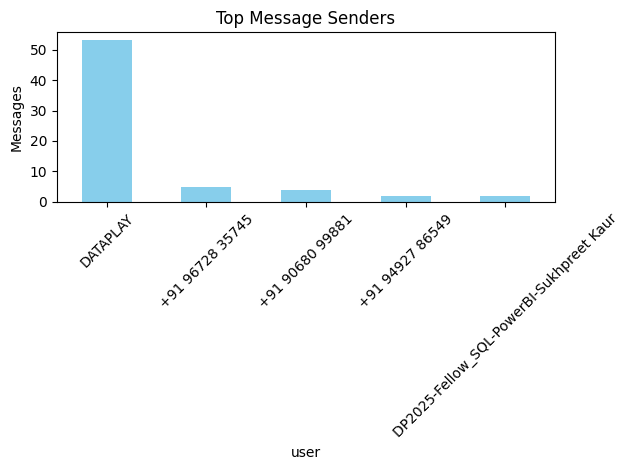

In [34]:
top_users = df["user"].value_counts().head(5)
if top_users.empty:
    print("No users found to plot. Check parsing.")
else:
    top_users.plot(kind="bar", title="Top Message Senders", color="skyblue")
    plt.ylabel("Messages")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [36]:
import matplotlib.pyplot as plt

# ⏰ Filter only join/leave event rows
trend_df = df[df["event"].notnull()]

# Group by date and event (join/leave), count occurrences
trend = (
    trend_df
    .groupby([df["datetime"].dt.date, "event"])
    .size()
    .unstack(fill_value=0)
)

# Plot if data exists
if trend.empty:
    print("⚠️ No join/leave data available to plot.")
else:
    plt.figure(figsize=(12, 6))
    trend.plot(kind="bar", stacked=True, colormap="Set2", ax=plt.gca())
    plt.title("📈 Join/Leave Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Events")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig("outputs/join_leave_trend.png")
    plt.show()


⚠️ No join/leave data available to plot.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# ⌚ Count join events per hour
join_hours = df[df["event"] == "join"]["hour"].value_counts().sort_index()

# Check if there's data to plot
if join_hours.empty:
    print("⚠️ No join events found to plot peak hours.")
else:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=join_hours.index, y=join_hours.values, palette="coolwarm")
    plt.title("⏰ Peak Hours of User Joining", fontsize=14)
    plt.xlabel("Hour of Day (24h)", fontsize=12)
    plt.ylabel("Number of Joins", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig("outputs/join_peak_hours.png")
    plt.show()


⚠️ No join events found to plot peak hours.
